### <center>  Shearlet and wavelet decomposition in Turbulance image  </center>

In [1]:
# Loard the Pkg
push!(LOAD_PATH,pwd()*"/../../src") 
import Shearlab
#using Shearlab
using PyPlot
reload("Shearlab")
using Images

ArrayFire v3.3.2 (OpenCL, 64-bit Mac OSX, build f65dd97)
[0] APPLE   : Intel(R) Iris(TM) Graphics 6100, 1536 MB


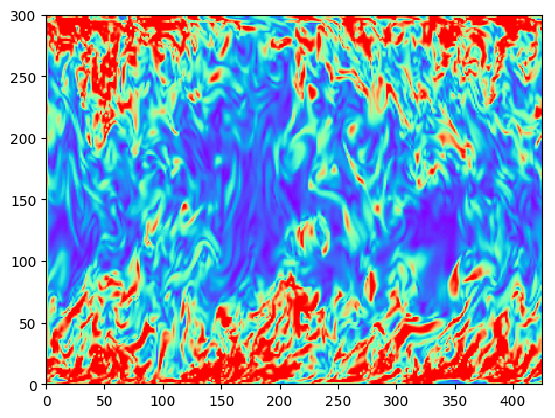

PyObject <matplotlib.collections.QuadMesh object at 0x14c174d50>

In [18]:
# Read Data
n = 300;
# The path of the image
name = "../../data_samples/turbulance_coarse.png";
data = Shearlab.load_image(name, n);
data = data[:,:,1];
#Shearlab.imageplot(data);
pcolormesh(data, cmap="rainbow")

In [3]:
# Metaparameters
sizeX = size(data,1);
sizeY = size(data,2);
rows = sizeX;
cols = sizeY;
X = data; 
nScales = 4;
shearLevels = ceil.((1:nScales)/2)
scalingFilter = Shearlab.filt_gen("scaling_shearlet");
directionalFilter = Shearlab.filt_gen("directional_shearlet");
waveletFilter = Shearlab.mirror(scalingFilter);
scalingFilter2 = scalingFilter;
full = 0;

In [4]:
# Compute the corresponding shearlet system without gpu
@time shearletSystem= Shearlab.getshearletsystem2D(rows,cols,4, shearLevels,full,
                                directionalFilter,
                                scalingFilter,0);

size(directionalFilterUpsampled'')=(68, 17)
size(filterLow2[size(filterLow2,2)-shearLevel]'')=(26,)
size(directionalFilterUpsampled'')=(136, 17)
size(filterLow2[size(filterLow2,2)-shearLevel]'')=(60,)
size(directionalFilterUpsampled'')=(68, 17)
size(filterLow2[size(filterLow2,2)-shearLevel]'')=(26,)
size(directionalFilterUpsampled'')=(136, 17)
size(filterLow2[size(filterLow2,2)-shearLevel]'')=(60,)
 15.167591 seconds (6.16 M allocations: 4.279 GiB, 20.94% gc time)


In [5]:
# Compute the coefficients
@time coeffs = Shearlab.SLsheardec2D(X,shearletSystem);

  0.853291 seconds (64.19 k allocations: 677.533 MiB, 43.70% gc time)


Visualize the corresponding elements and coefficients.

In [28]:
shearletSystem.shearletIdxs[1,:]

3-element Array{Any,1}:
  1
  1
 -2

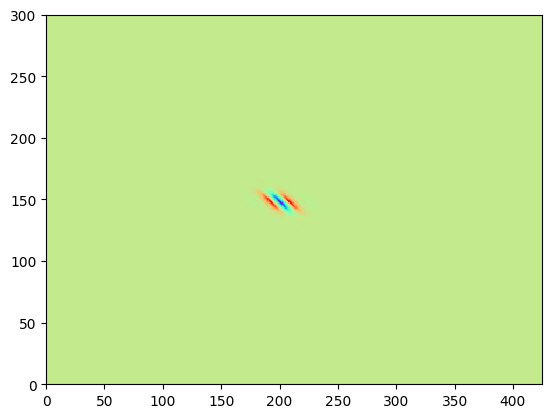

PyObject <matplotlib.collections.QuadMesh object at 0x13e895b50>

In [16]:
shearlet1 = Array(fftshift(ifft(ifftshift(shearletSystem.shearlets[:,:,1]))));
#Shearlab.imageplot(real(shearlet1));
pcolormesh(real(shearlet1),cmap="rainbow")

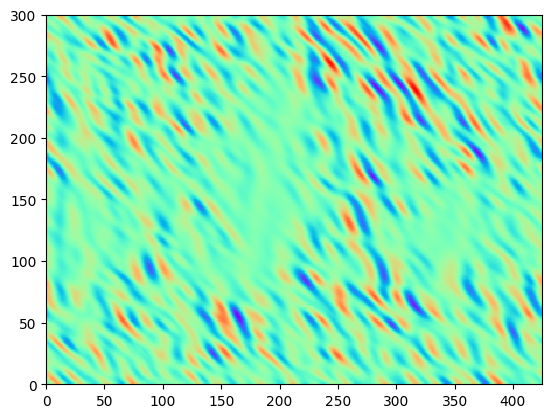

PyObject <matplotlib.collections.QuadMesh object at 0x14c21bb10>

In [17]:
#Shearlab.imageplot(real(Array(coeffs[:,:,1])))
pcolormesh(real(Array(coeffs[:,:,1])),cmap="rainbow")

In [30]:
shearletSystem.shearletIdxs[5,:]

3-element Array{Any,1}:
 1
 1
 2

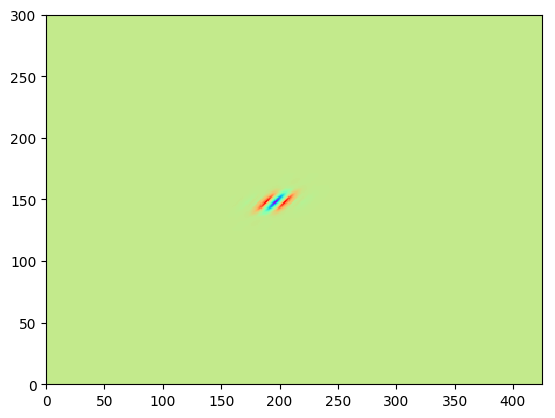

PyObject <matplotlib.collections.QuadMesh object at 0x148864c10>

In [21]:
shearlet5 = Array(fftshift(ifft(ifftshift(shearletSystem.shearlets[:,:,5]))));
#Shearlab.imageplot(real(shearlet1));
pcolormesh(real(shearlet5),cmap="rainbow")

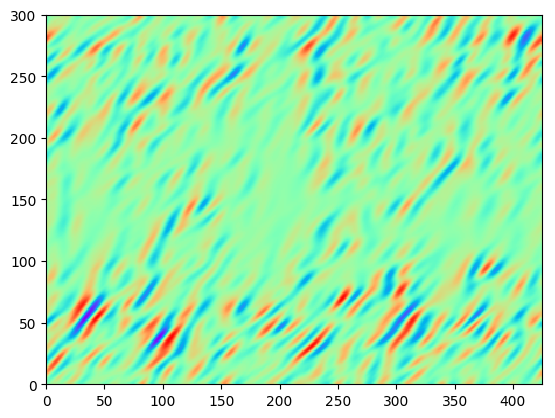

PyObject <matplotlib.collections.QuadMesh object at 0x152581dd0>

In [22]:
#Shearlab.imageplot(real(Array(coeffs[:,:,5])))
pcolormesh(real(Array(coeffs[:,:,5])),cmap="rainbow")

In [31]:
shearletSystem.shearletIdxs[20,:]

3-element Array{Any,1}:
  1
  4
 -4

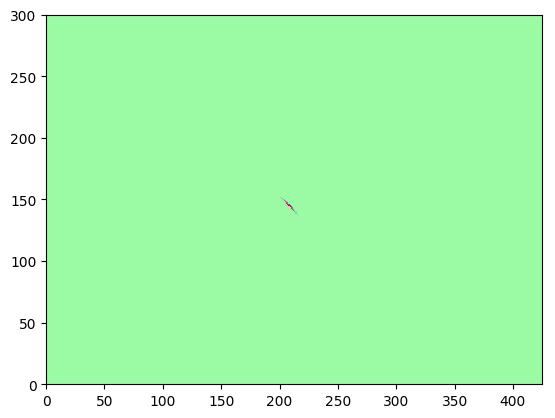

PyObject <matplotlib.collections.QuadMesh object at 0x1479c8650>

In [32]:
shearlet20 = Array(fftshift(ifft(ifftshift(shearletSystem.shearlets[:,:,20]))));
#Shearlab.imageplot(real(shearlet1));
pcolormesh(real(shearlet20),cmap="rainbow")

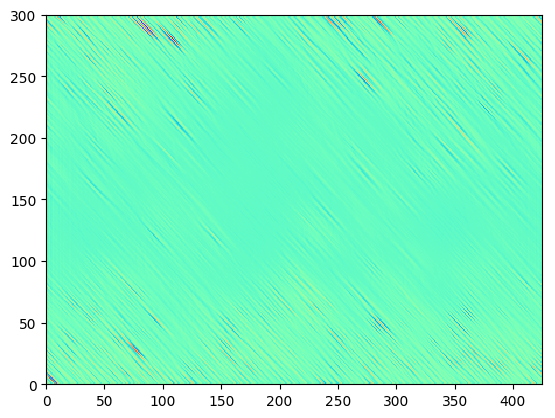

PyObject <matplotlib.collections.QuadMesh object at 0x14c79d910>

In [36]:
#Shearlab.imageplot(real(Array(coeffs[:,:,20])))
pcolormesh(real(Array(coeffs[:,:,20])), cmap="rainbow")

In [37]:
shearletSystem.shearletIdxs[30,:]

3-element Array{Any,1}:
 2
 1
 0

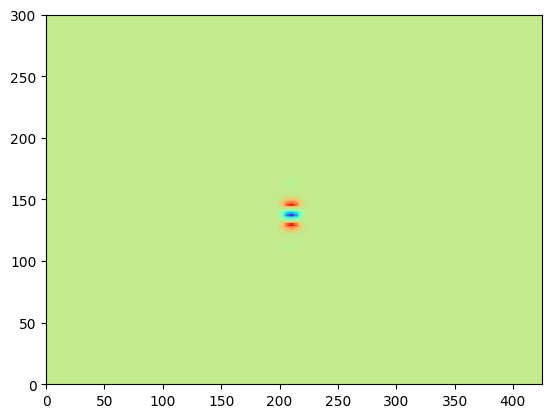

PyObject <matplotlib.collections.QuadMesh object at 0x14c00b850>

In [38]:
shearlet30 = Array(fftshift(ifft(ifftshift(shearletSystem.shearlets[:,:,30]))));
#Shearlab.imageplot(real(shearlet1));
pcolormesh(real(shearlet30),cmap="rainbow")

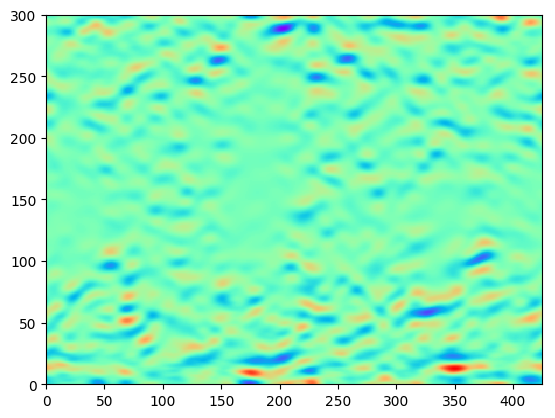

PyObject <matplotlib.collections.QuadMesh object at 0x147ead810>

In [40]:
pcolormesh(real(Array(coeffs[:,:,30])), cmap="rainbow")

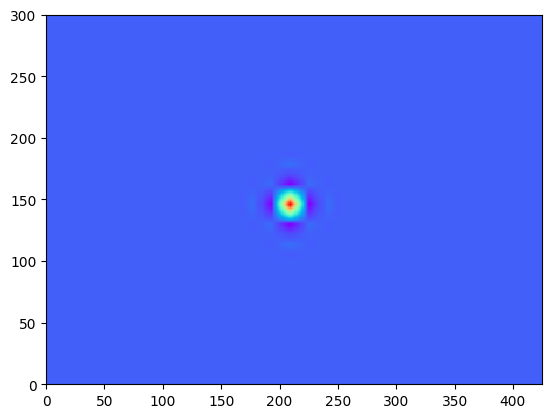

PyObject <matplotlib.collections.QuadMesh object at 0x14e60e050>

In [41]:
shearlet49 = Array(fftshift(ifft(ifftshift(shearletSystem.shearlets[:,:,49]))));
#Shearlab.imageplot(real(shearlet1));
pcolormesh(real(shearlet49),cmap="rainbow")

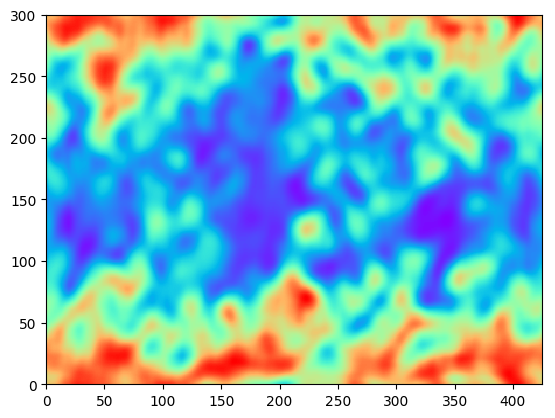

PyObject <matplotlib.collections.QuadMesh object at 0x1577b7210>

In [42]:
pcolormesh(real(Array(coeffs[:,:,49])), cmap="rainbow")

In [43]:
# Make the recovery
reco=Shearlab.SLshearrec2D(coeffs,shearletSystem);

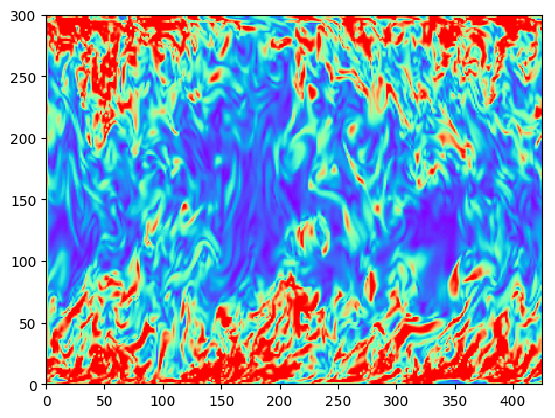

PyObject <matplotlib.collections.QuadMesh object at 0x152d49150>

In [44]:
pcolormesh(reco, cmap="rainbow")

In [45]:
# Binary indices corresponding to coefficients of scale less tahn 3
bin_indices = shearletSystem.shearletIdxs[:,2].>3;
# Lets get the coefficients that are corresponding to this scales
scales_coeffs = copy(coeffs);
scales_coeffs[:,:,bin_indices] = 0;

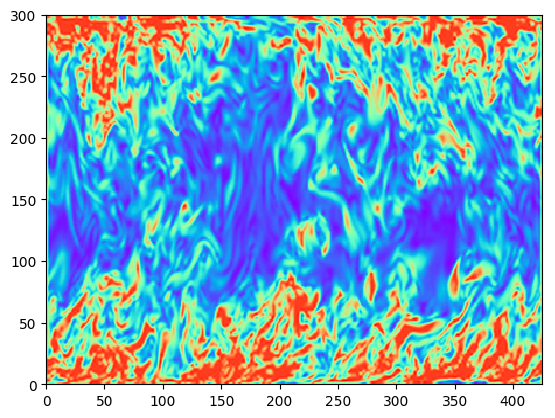

PyObject <matplotlib.collections.QuadMesh object at 0x14aa4b1d0>

In [46]:
# Lets recover the
scales_reco = Shearlab.SLshearrec2D(scales_coeffs,shearletSystem);
pcolormesh(scales_reco,cmap="rainbow")

### Now using the wavelet transform

In [47]:
using Wavelets
# Filter call
h=Shearlab.filt_gen(WT.db2)
# The filter associated to the wavelet function will be the mirror filter
g = Shearlab.mirror(h);

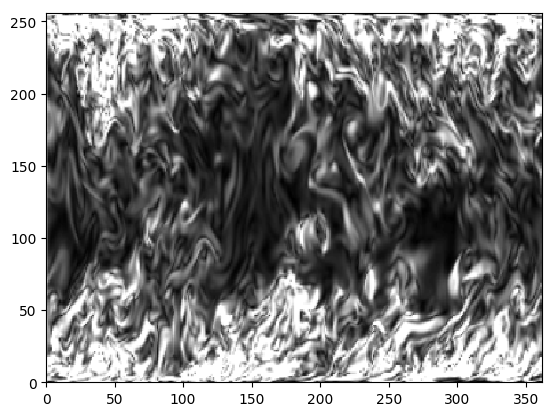

PyObject <matplotlib.collections.QuadMesh object at 0x158c19090>

In [87]:
n = 256;
# The path of the image
name = "./../../data_samples/turbulance_coarse.png";
f = Shearlab.load_image(name, n);
#Rescale image in [0,1] summing the 3 arrays in the RGB format
f = Shearlab.rescale(sum(f,3));
# Reduce one dimension 
f = f[:,:,1];
#Shearlab.imageplot(f);
pcolormesh(f)

In [71]:
# Starts with coarsest scale
j = round(Int64,log2(n)-1);

In [72]:
# Sampling with the coarsest scale
fW = copy(f);
A = fW[1:2^(j+1),1:2^(j+1)];
# The high scales and low scales elements
Coarse = Shearlab.subsampling(Shearlab.cconvol(A,h,1),1);
Detail = Shearlab.subsampling(Shearlab.cconvol(A,g,1),1);

In [73]:
size(A),size(Coarse),size(Detail)

((256, 256), (128, 256), (128, 256))

In [74]:
# Check energy conservation
norm(A[:])^2 - norm(Coarse[:])^2 - norm(Detail[:])^2

5.968558980384842e-13

In [75]:
#Concatenate them in the vertical direction
A = cat(1, Coarse, Detail );

In [76]:
size(A)

(256, 256)

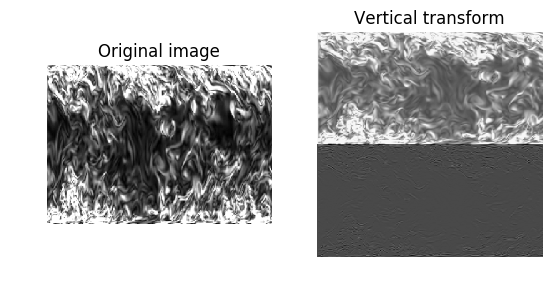

In [77]:
clf;
Shearlab.imageplot(f,"Original image",1,2,1);
Shearlab.imageplot(A,"Vertical transform",1,2,2);

In [78]:
Coarse = Shearlab.subsampling(Shearlab.cconvol(A,h,2),2);
Detail = Shearlab.subsampling(Shearlab.cconvol(A,g,2),2);

In [79]:
A = cat(2, Coarse, Detail );

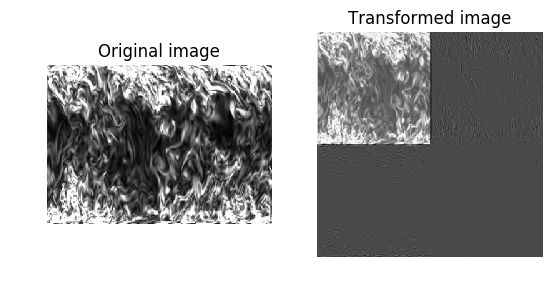

In [80]:
clf;
Shearlab.imageplot(f,"Original image",1,2,1);
Shearlab.imageplot(A,"Transformed image",1,2,2);

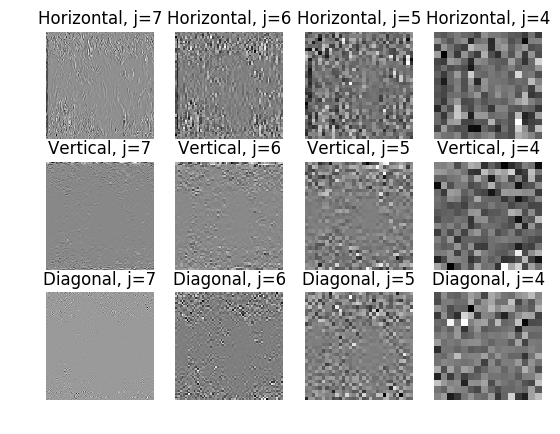

In [83]:
Jmax = round(Int64,log2(n))-1;
Jmin = 1;
fW = copy(f);
clf;
for j=Jmax:-1:Jmin
    A = fW[1:2^(j+1),1:2^(j+1)];
    for d=1:2
        Coarse = Shearlab.subsampling(Shearlab.cconvol(A,h,d),d);
        Detail = Shearlab.subsampling(Shearlab.cconvol(A,g,d),d);
        A = cat(d, Coarse, Detail );
    end
    fW[1:2^(j+1),1:2^(j+1)] = A;
    j1 = Jmax-j;
    if j1<4
        Shearlab.imageplot(A[1:2^j,2^j+1:2^(j+1)], "Horizontal, j=$j", 3,4, j1 + 1);
        Shearlab.imageplot(A[2^j+1:2^(j+1),1:2^j], "Vertical, j=$j", 3,4, j1 + 5);
        Shearlab.imageplot(A[2^j+1:2^(j+1),2^j+1:2^(j+1)], "Diagonal, j=$j", 3,4, j1 + 9);
    end
end

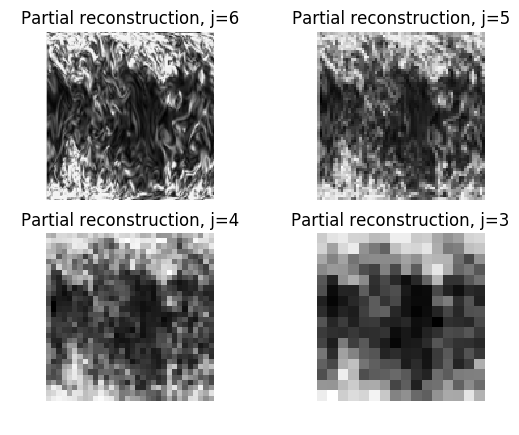

In [86]:
f1 = copy(fW);
clf;
for j=Jmin:Jmax
    A = f1[1:2^(j+1),1:2^(j+1)];
    for d=1:2
        if d==1
            Coarse = A[1:2^j,:];
            Detail = A[2^j+1:2^(j+1),:];
        else
            Coarse = A[:,1:2^j];
            Detail = A[:,2^j+1:2^(j+1)];                
        end
        Coarse = Shearlab.cconvol(Shearlab.upsampling(Coarse,d),Shearlab.reverse(h),d);
        Detail = Shearlab.cconvol(Shearlab.upsampling(Detail,d),Shearlab.reverse(g),d);
        A = Coarse + Detail;
        j1 = Jmax-j;
        if j1>0 && j1<5
            Shearlab.imageplot(A, "Partial reconstruction, j=$j", 2,2,j1);
        end
    end
    f1[1:2^(j+1),1:2^(j+1)] = A;
end